In [24]:
from pbcpy.grid import Plot
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF
from pbcpy.base import Coord
from pbcpy.base import Cell
from pbcpy.base import Cell
from pbcpy.grid import Grid
import numpy as np
from pbcpy.base import pbcarray
from matplotlib.ticker import OldScalarFormatter, ScalarFormatter
import  matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [25]:
# conversion
ry_to_ev = 13.6057

In [26]:
#creating pandas dataframe
nacl_2 = [-131.52699682, -131.68772522,-33.95799557,-34.06561718,
          -33.95942329, -34.06413343,-0.02527983,-0.01687685, 33.88419505, 26.90089120, 33.42118958,26.52789721]
nacl_16 = [-1055.36823601,-1055.28241216,-34.75405955,-34.47259409,
          -34.73564723,-34.46559322,-0.00040325,0.00109879,30.59864607,25.32274191,30.83155687,25.39295204]
nacl_54 = [-3561.89951567,-3561.79139101,-34.76338608,-34.47339065,
          -34.73976835,-34.45456551,-0.00010347,0.01269662, 30.41721942, 25.30888866, 30.75206237,25.37771517]
nacl_128 = [-8443.02191455, -8442.90085265, -34.76367860, -34.47339211,
           -34.74347789, -34.43093509,-0.00376779,0.03635009,30.40326706,25.30883730,30.74785147,25.37634914]
d_shifts_energy_g0 = [0.7428094686421876, 0.36842023551533565, 0.24524517828674153, 0.18383722266141778]
interaction_e_nuclear_eV = [-1.5657594899992811,-1.8167704665287987,-1.8558535146531527,-1.8188383178595571]

In [27]:
data_table = pd.DataFrame([nacl_2,nacl_16,nacl_54,nacl_128],
                          columns=['vtot', 'vtot_charge', 'MT', 'MT_charge', 'map', 'map_charged','E interaction',
                                   'E ion interaction', 'E_hart_MT','E_hart_MT_charged','E_hart', 'E_hart_charged'],
                          index = ['2','16','54','128'])
data_table

,vtot,vtot_charge,MT,MT_charge,map,map_charged,E interaction,E ion interaction,E_hart_MT,E_hart_MT_charged,E_hart,E_hart_charged
2,-131.526997,-131.687725,-33.957996,-34.065617,-33.959423,-34.064133,-0.025280,-0.016877,33.884195,26.900891,33.421190,26.527897
16,-1055.368236,-1055.282412,-34.754060,-34.472594,-34.735647,-34.465593,-0.000403,0.001099,30.598646,25.322742,30.831557,25.392952
54,-3561.899516,-3561.791391,-34.763386,-34.473391,-34.739768,-34.454566,-0.000103,0.012697,30.417219,25.308889,30.752062,25.377715
128,-8443.021915,-8442.900853,-34.763679,-34.473392,-34.743478,-34.430935,-0.003768,0.036350,30.403267,25.308837,30.747851,25.376349


In [28]:
# calculating ionization energies and relativ ionization energies*
data_table['ion_pot_super / eV'] = (data_table['vtot_charge'] - data_table['vtot'])*ry_to_ev
data_table['ion_pot_iso / eV'] = (data_table['MT_charge'] - data_table['MT'])*ry_to_ev 
data_table['ion_pot_map / eV'] = (data_table['map_charged'] - data_table['map'])*ry_to_ev
data_table['delta E hart'] = (data_table['E_hart_charged'] - data_table['E_hart'])*ry_to_ev
data_table['delta E hart MT'] = (data_table['E_hart_MT_charged'] - data_table['E_hart_MT'])*ry_to_ev
data_table

,vtot,vtot_charge,MT,MT_charge,map,map_charged,E interaction,E ion interaction,E_hart_MT,E_hart_MT_charged,E_hart,E_hart_charged,ion_pot_super / eV,ion_pot_iso / eV,ion_pot_map / eV,delta E hart,delta E hart MT
2,-131.526997,-131.687725,-33.957996,-34.065617,-33.959423,-34.064133,-0.025280,-0.016877,33.884195,26.900891,33.421190,26.527897,-2.186822,-1.464267,-1.424655,-93.788068,-95.012737
16,-1055.368236,-1055.282412,-34.754060,-34.472594,-34.735647,-34.465593,-0.000403,0.001099,30.598646,25.322742,30.831557,25.392952,1.167694,3.829535,3.674274,-73.996026,-71.782369
54,-3561.899516,-3561.791391,-34.763386,-34.473391,-34.739768,-34.454566,-0.000103,0.012697,30.417219,25.308889,30.752062,25.377715,1.471112,3.945591,3.880384,-73.121756,-69.502416
128,-8443.021915,-8442.900853,-34.763679,-34.473392,-34.743478,-34.430935,-0.003768,0.036350,30.403267,25.308837,30.747851,25.376349,1.647132,3.949551,4.252364,-73.083049,-69.313283


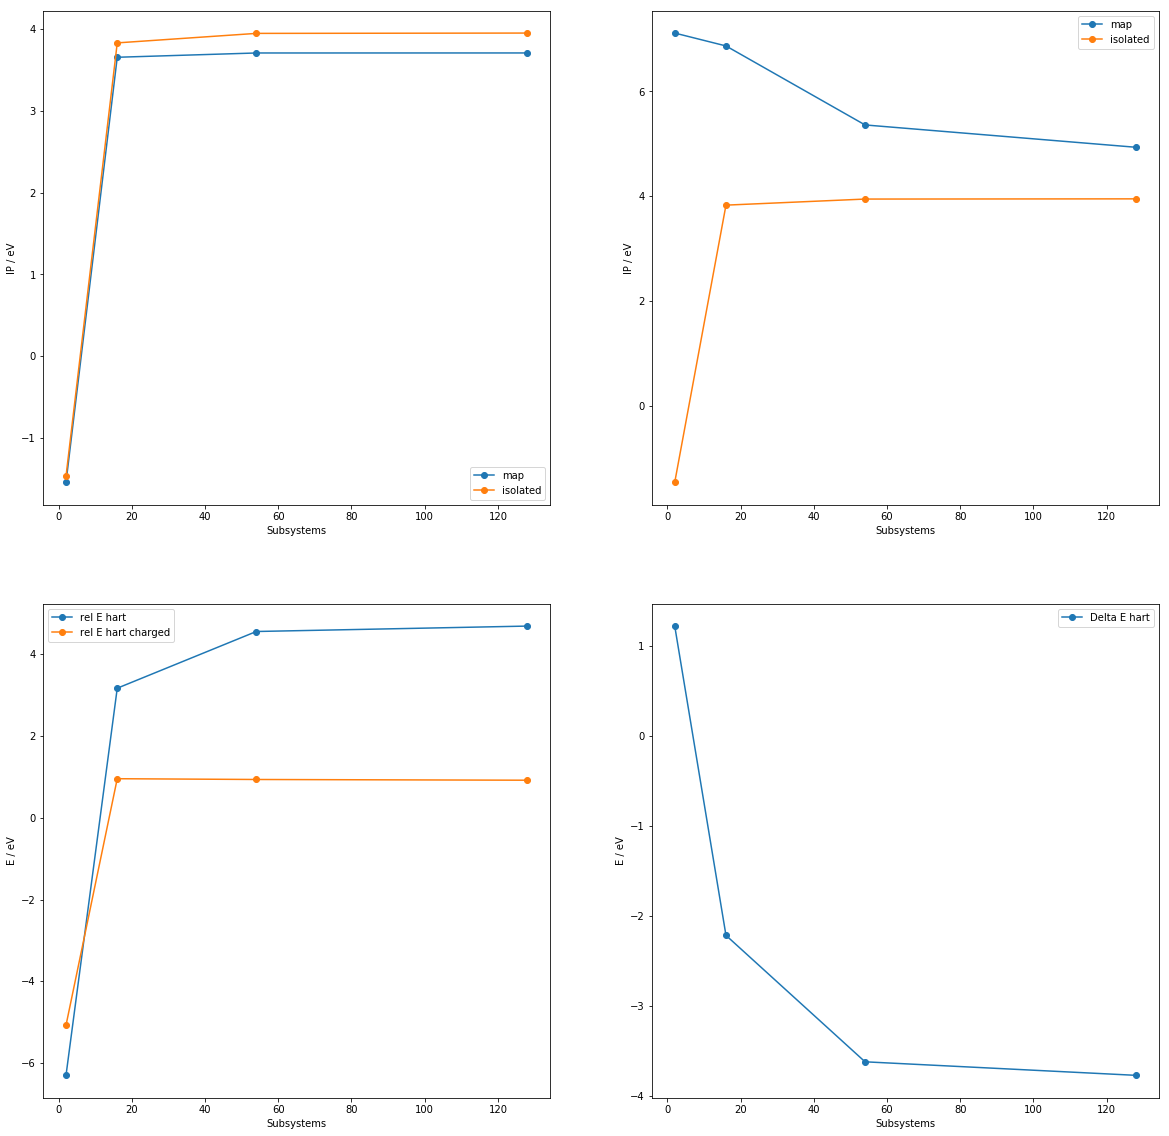

In [29]:
# plotting results
mpl.rcParams['figure.figsize'] = (20,20)
fig, axes = plt.subplots(nrows=2,ncols=2)

subsystems = [2,16,54,128]

axes[0][0].plot(subsystems, data_table['ion_pot_map / eV']-(data_table['E ion interaction']-data_table['E interaction'])*ry_to_ev, label = 'map', marker = 'o')
axes[0][0].plot(subsystems, data_table['ion_pot_iso / eV'], label = 'isolated', marker = 'o')

axes[0][0].set_xlabel('Subsystems')
axes[0][0].set_ylabel('IP / eV')
axes[0][0].legend()

axes[0][1].plot(subsystems, data_table['ion_pot_map / eV'] + interaction_e_nuclear_eV + ry_to_ev*np.array(d_shifts_energy_g0), label = 'map', marker = 'o')
#axes[0][1].plot(subsystems, data_table['ion_pot_super / eV'], label = 'supercell', marker = 'o')
axes[0][1].plot(subsystems, data_table['ion_pot_iso / eV'], label = 'isolated', marker = 'o')

axes[0][1].set_xlabel('Subsystems')
axes[0][1].set_ylabel('IP / eV')
axes[0][1].legend()

axes[1][0].plot(subsystems, (data_table['E_hart'] - data_table['E_hart_MT'])*ry_to_ev,label = 'rel E hart', marker = 'o')
axes[1][0].plot(subsystems, (data_table['E_hart_charged'] - data_table['E_hart_MT_charged'])*ry_to_ev, label = 'rel E hart charged', marker = 'o')

axes[1][0].set_xlabel('Subsystems')
axes[1][0].set_ylabel('E / eV')
axes[1][0].legend()

axes[1][1].plot(subsystems, data_table['delta E hart'] - data_table['delta E hart MT'],label = 'Delta E hart', marker = 'o')

axes[1][1].set_xlabel('Subsystems')
axes[1][1].set_ylabel('E / eV')
axes[1][1].legend()


plt.show()

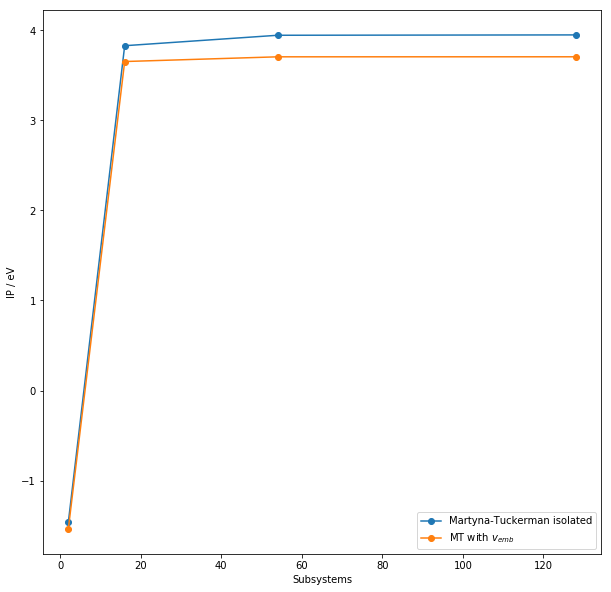

In [30]:
# plotting results
mpl.rcParams['figure.figsize'] = (10,10)

subsystems = [2,16,54,128]

plt.plot(subsystems, data_table['ion_pot_iso / eV'], label = 'Martyna-Tuckerman isolated', marker = 'o')
plt.plot(subsystems, data_table['ion_pot_map / eV']-(data_table['E ion interaction']-data_table['E interaction'])*ry_to_ev, label = 'MT with $v_{emb}$', marker = 'o')


plt.xlabel('Subsystems')
plt.ylabel('IP / eV')
plt.legend()
plt.savefig(fname = 'NaCl_dE_polarization')
plt.show()

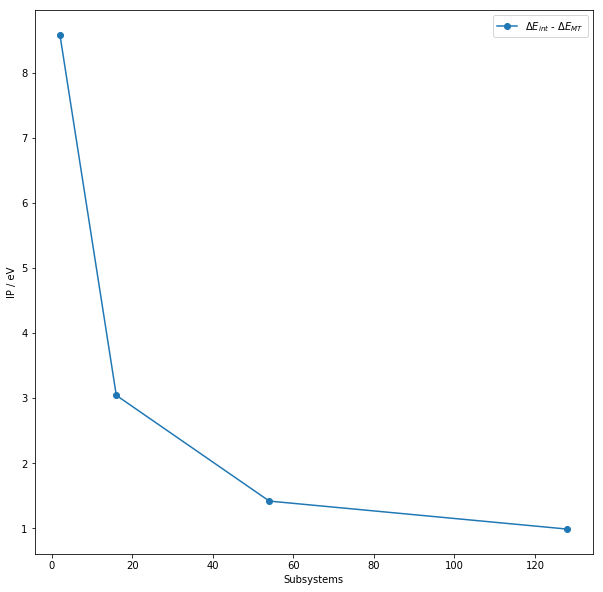

In [35]:
# plotting results
mpl.rcParams['figure.figsize'] = (10,10)

subsystems = [2,16,54,128]

plt.plot(subsystems, data_table['ion_pot_map / eV'] + interaction_e_nuclear_eV + ry_to_ev*np.array(d_shifts_energy_g0) - data_table['ion_pot_iso / eV'], label = '$\Delta E_{int}$ - $\Delta E_{MT}$', marker = 'o')
#axes[0][1].plot(subsystems, data_table['ion_pot_super / eV'], label = 'supercell', marker = 'o')
#plt.plot(subsystems, data_table['ion_pot_iso / eV'], label = 'Martyna-Tuckerman isolated', marker = 'o')

plt.xlabel('Subsystems')
plt.ylabel('IP / eV')
plt.legend()
plt.savefig(fname = 'NaCl_dE_Interaction')
plt.show()

# Polarization Response:

In the case of the Hartree interaction we see a nice response of the density of the fragment I due to the embedding potential.

$$
\chi = \frac{\delta \rho_I}{\delta v_{emb}}
$$

This is a polarization effect. It becomes clear that the IP is lowered due to this response.